In [89]:
import cv2
from PIL import Image
import copy
import numpy as np

# Part I

## Reading image in 3 Modes

In [90]:
##mode 1
img = cv2.imread(r'kia_k5.jpg',0)
##mode 2
img1 = cv2.imread(r'kia_k5.jpg',1)
##mode 3
img2 = cv2.imread(r'kia_k5.jpg',-1)

## Resize an image to 300*300

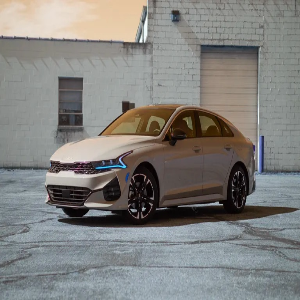

In [91]:
img1_resize = cv2.resize(img1,(300,300))
Image.fromarray(img1_resize)

## Transpose the image.

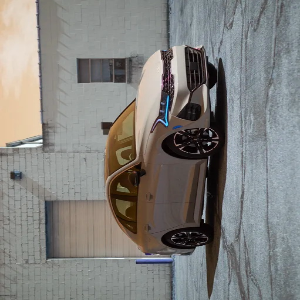

In [92]:
img1_transpose = cv2.transpose(img1_resize)
Image.fromarray(img1_transpose)

## Color to Grayscale

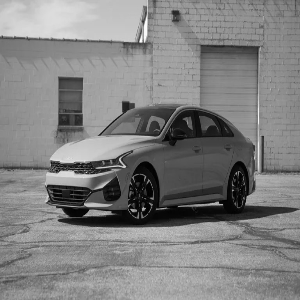

In [93]:
img1_clr_gr = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2GRAY)
Image.fromarray(img1_clr_gr)

## Invert a color Image and a Grayscale Image

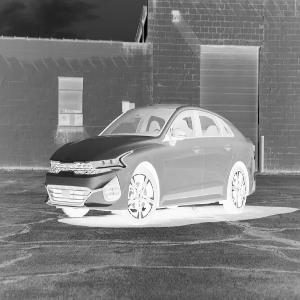

In [94]:
#inverting grayscale image
img_gray_invrt = 255-img
img_gray_invrt = cv2.resize(img_gray_invrt,(300,300))
Image.fromarray(img_gray_invrt)

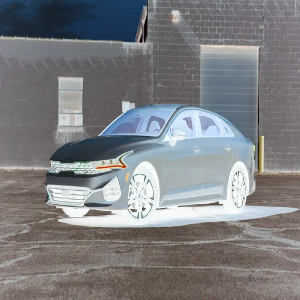

In [95]:
#inverting color image
img1_clr_invrt = 255-img1_resize
Image.fromarray(img1_clr_invrt)

## Saving Images to a directory

In [96]:
cv2.imwrite(r'resize.jpg',img1_resize)
cv2.imwrite(r'grayscale.jpg',img1_clr_gr)
cv2.imwrite(r'grayscale_invert.jpg',img_gray_invrt)

True

## Display your results in horizontal window

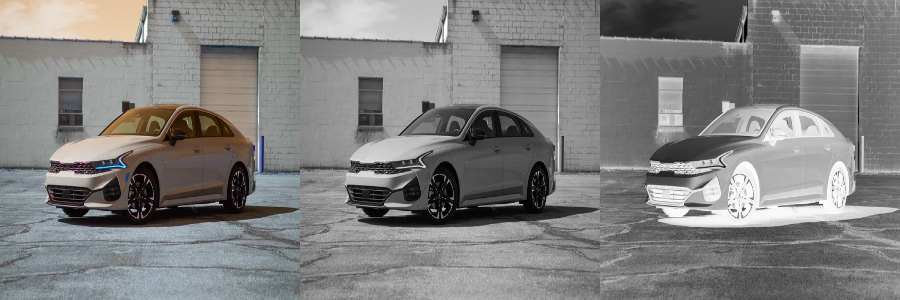

In [97]:
#converting grayscale to color so can concatenate as concatenation can happen with same dimensions only
img1_clr_gr_3dim = cv2.cvtColor(img1_clr_gr, cv2.COLOR_GRAY2BGR)
img_gray_invrt_3dim = cv2.cvtColor(img_gray_invrt, cv2.COLOR_GRAY2BGR)
#concatenating
con = np.concatenate((img1_resize,img1_clr_gr_3dim,img_gray_invrt_3dim), axis=1)
Image.fromarray(con)

## Capture a video using OpenCV
#### Press q to quit window

In [98]:
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

# Part II

## Applying Laplacian filter

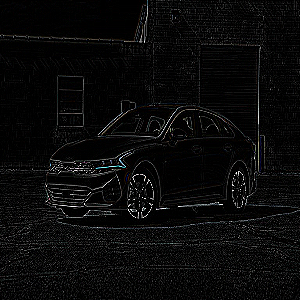

In [99]:
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

laplacian_img = cv2.filter2D(img1_resize, -1, kernel)
Image.fromarray(laplacian_img)

## Applying Prewitt (horizontal,vertical) filter

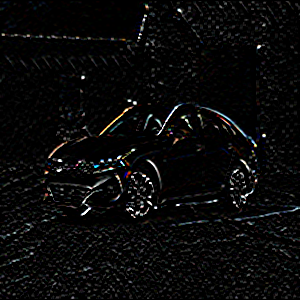

In [100]:
kernel_horizontal =  np.array([[-1, -1, -1],
                               [0, 0, 0],
                               [1, 1, 1]])

kernel_vertical =  np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

prewitt_img = cv2.filter2D(img1_resize, -1, kernel_vertical)
prewitt_img = cv2.filter2D(prewitt_img, -1, kernel_horizontal)
Image.fromarray(prewitt_img)

## Applying Sobel (horizontal,vertical) filter

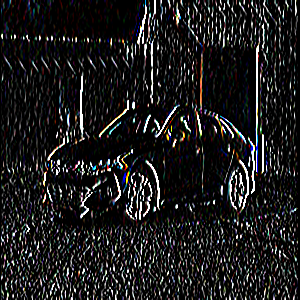

In [101]:
kernel_horizontal_sobel =  np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])

kernel_vertical_sobel =  np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

sobel_img = cv2.filter2D(img1_resize, -1, kernel_vertical_sobel)
sobel_img = cv2.filter2D(sobel_img, -1, kernel_horizontal_sobel)
Image.fromarray(sobel_img)

## Applying Average filter

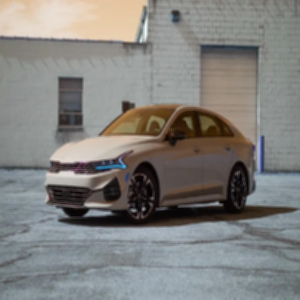

In [102]:
average_filter = np.array([[1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9]])

smooth_img = cv2.filter2D(img1_resize, -1, average_filter)
Image.fromarray(smooth_img)

# Part III

## Reading a group image and applying grayscale

In [104]:
grp = cv2.imread(r'group.jpg',0)

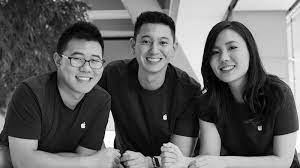

In [105]:
Image.fromarray(grp)

## Cropping to a face

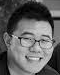

In [106]:
cropped_image = grp[20:95, 50:110]
Image.fromarray(cropped_image)

## Function to overlay one image on other image

In [107]:
def overlayy(img,overlay_img,x_offset,y_offset):
    img_overlay = copy.copy(img)#creating a shallow copy
    x_end = x_offset + overlay_img.shape[1]
    y_end = y_offset + overlay_img.shape[0]
    img_overlay[y_offset:y_end,x_offset:x_end] = overlay_img
    return img_overlay

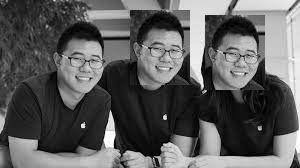

In [108]:
#face replicated by function 
Image.fromarray(overlayy((overlayy(grp,cropped_image,205,15)),cropped_image,130,10))

## Function to overlay one image on other image

In [109]:
def blend(img1,overlay_img,x_offset,y_offset):
    img = copy.copy(img1)
    print(overlay_img.shape[0])
    cropped_image = grp[y_offset:y_offset+overlay_img.shape[0], x_offset:x_offset+overlay_img.shape[1]]
    img_blend = cv2.addWeighted(cropped_image,0.5,overlay_img,0.8,0)
    final_img = overlayy(grp,img_blend,x_offset,y_offset)
    return final_img

75


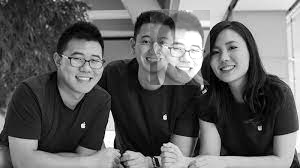

In [110]:
Image.fromarray(blend(grp,cropped_image,150,10))